# Анализ метаданных

In [30]:
import os
import csv
from PIL import Image

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
def get_image_info(image_path):
    image = Image.open(image_path)
    info = {
        'Mode': image.mode,
        'Width': image.width,
        'Height': image.height,
        **image.info,
    }
    return info

In [33]:
original_folder = '/content/drive/MyDrive/ITMO/lisa-lab/img/original/'
generated_folder = '/content/drive/MyDrive/ITMO/lisa-lab/img/generated/'

all_info_keys = set()

In [34]:
for original_filename in os.listdir(original_folder):
    if original_filename.endswith('.jpg') or original_filename.endswith('.png'):
        original_image_path = os.path.join(original_folder, original_filename)
        generated_image_path = os.path.join(generated_folder, original_filename)

        if not os.path.exists(generated_image_path):
            for generated_filename in os.listdir(generated_folder):
                original_filename_no_ext = original_filename.split('.')[0]
                if generated_filename.startswith(original_filename_no_ext):
                    generated_image_path = os.path.join(generated_folder, generated_filename)
                    break

        if os.path.exists(generated_image_path):
            original_info = get_image_info(original_image_path)
            generated_info = get_image_info(generated_image_path)

            all_info_keys.update(original_info.keys())
            all_info_keys.update(generated_info.keys())

In [35]:
import pandas as pd

data = []
columns = ['Filename', 'Width', 'Height', 'Mode', *all_info_keys]

for original_filename in os.listdir(original_folder):
    if original_filename.endswith('.jpg') or original_filename.endswith('.png'):
        original_image_path = os.path.join(original_folder, original_filename)
        generated_image_path = os.path.join(generated_folder, original_filename)

        if not os.path.exists(generated_image_path):
            for generated_filename in os.listdir(generated_folder):
                original_filename_no_ext = original_filename.split('.')[0]
                if generated_filename.startswith(original_filename_no_ext):
                    generated_image_path = os.path.join(generated_folder, generated_filename)
                    break

        generated_filename = os.path.basename(generated_image_path)

        if os.path.exists(generated_image_path):
            original_info = get_image_info(original_image_path)
            generated_info = get_image_info(generated_image_path)

            data.append({**{'Filename': original_filename  + " original"}, **original_info})
            data.append({**{'Filename': generated_filename + " modified"}, **generated_info})

df = pd.DataFrame(data, columns=columns)
df.to_csv('output.csv', index=False)
df

Filename  Width  Height Mode  Width  Height  \
0  5.jpg original    564     564  RGB    564     564   
1  5.jpg modified   1472    1472  RGB   1472    1472   
2  4.jpg original   1024    1024  RGB   1024    1024   
3  4.jpg modified   1024    1024  RGB   1024    1024   
4  3.jpg original    236     354  RGB    236     354   
5  3.jpg modified    236     354  RGB    236     354   
6  2.jpg original    564     705  RGB    564     705   
7  2.jpg modified    564     705  RGB    564     705   
8  1.jpg original    612     408  RGB    612     408   
9  1.jpg modified    612     408  RGB    612     408   

                                             comment  jfif_unit  progressive  \
0                                                NaN          0          1.0   
1                                                NaN          1          1.0   
2  b'CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), ...          1          NaN   
3  b'CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), ...          1          NaN   
4                                                NaN          1          1.0   
5                                                NaN          0          NaN   
6                                                NaN          1          1.0   
7                                                NaN          0          NaN   
8                                                NaN          1          1.0   
9                                                NaN          0          NaN   

   progression  jfif Mode jfif_density  \
0          1.0   257  RGB       (1, 1)   
1          1.0   257  RGB     (72, 72)   
2          NaN   257  RGB     (96, 96)   
3          NaN   257  RGB     (96, 96)   
4          1.0   257  RGB     (72, 72)   
5          NaN   257  RGB       (1, 1)   
6          1.0   257  RGB     (96, 96)   
7          NaN   257  RGB       (1, 1)   
8          1.0   257  RGB   (300, 300)   
9          NaN   257  RGB       (1, 1)   

                                           photoshop         dpi  \
0                                                NaN         NaN   
1                                                NaN    (72, 72)   
2                                                NaN    (96, 96)   
3                                                NaN    (96, 96)   
4  {1028: b'', 1061: b'\xd4\x1d\x8c\xd9\x8f\x00\x...    (72, 72)   
5                                                NaN         NaN   
6                                                NaN    (96, 96)   
7                                                NaN         NaN   
8  {1028: b'\x1c\x02P\x00\tViewApart\x1c\x02x\x00...  (300, 300)   
9                                                NaN         NaN   

                                                exif jfif_version  
0                                                NaN       (1, 1)  
1                                                NaN       (1, 1)  
2                                                NaN       (1, 1)  
3                                                NaN       (1, 1)  
4                                                NaN       (1, 1)  
5                                                NaN       (1, 1)  
6                                                NaN       (1, 1)  
7                                                NaN       (1, 1)  
8  b'Exif\x00\x00II*\x00\x08\x00\x00\x00\x03\x00\...       (1, 1)  
9                                                NaN       (1, 1)

# Распознование лиц

In [36]:
!pip install deepface

In [37]:
import cv2
from deepface import DeepFace
from typing import List, Dict, Any


def detect_faces(img_path: str) -> List[Dict[str, Any]]:
    img = cv2.imread(img_path)
    detected_faces = DeepFace.extract_faces(img)
    return detected_faces


def extract_face(img_path: str, face_data: Dict[str, Any]) -> Any:
    img = cv2.imread(img_path)
    facial_area = face_data['facial_area']
    x,y,w,h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
    face_img = img[y:y+h, x:x+w]
    return face_img

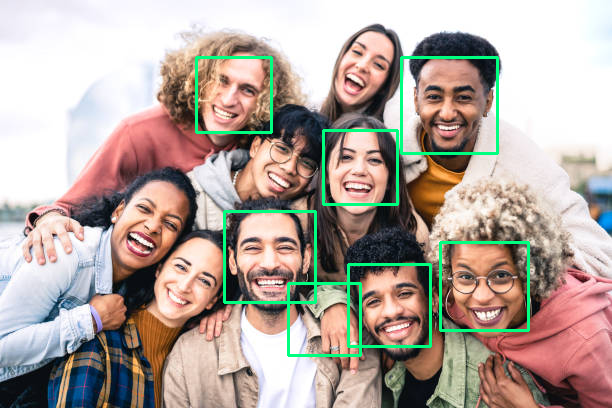

In [38]:
from google.colab.patches import cv2_imshow


img_path = '/content/drive/MyDrive/ITMO/lisa-lab/img/original/'


img = cv2.imread(img_path + '1.jpg')
detected_faces = detect_faces(img_path + '1.jpg')

for i, face_data in enumerate(detected_faces):
    face_img = extract_face(img_path + '1.jpg', face_data)

    #cv2_imshow(face_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

for face_data in detected_faces:
    face = face_data['face']
    facial_area = face_data['facial_area']
    x,y,w,h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
    cv2.rectangle(img, (x, y), (x+w, y+h), (128, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Методы поиска артефактов

## RGB statistics

In [10]:
import os
import cv2
import numpy as np
from scipy.stats import pearsonr


def compute_rgb_statistics(image):
    r_channel = image[:,:,0]
    g_channel = image[:,:,1]
    b_channel = image[:,:,2]

    r_mean = np.mean(r_channel)
    g_mean = np.mean(g_channel)
    b_mean = np.mean(b_channel)

    r_median = np.median(r_channel)
    g_median = np.median(g_channel)
    b_median = np.median(b_channel)

    r_quantiles = np.percentile(r_channel, [75, 90])
    g_quantiles = np.percentile(g_channel, [75, 90])
    b_quantiles = np.percentile(b_channel, [75, 90])

    r_var = np.var(r_channel)
    g_var = np.var(g_channel)
    b_var = np.var(b_channel)

    rg_correlation, _ = pearsonr(r_channel.flatten(), g_channel.flatten())
    rb_correlation, _ = pearsonr(r_channel.flatten(), b_channel.flatten())
    gb_correlation, _ = pearsonr(g_channel.flatten(), b_channel.flatten())

    return {
        'r_mean': r_mean, 'g_mean': g_mean, 'b_mean': b_mean,
        'r_median': r_median, 'g_median': g_median, 'b_median': b_median,
        'r_75_quantile': r_quantiles[0], 'g_75_quantile': g_quantiles[0], 'b_75_quantile': b_quantiles[0],
        'r_90_quantile': r_quantiles[1], 'g_90_quantile': g_quantiles[1], 'b_90_quantile': b_quantiles[1],
        'r_var': r_var, 'g_var': g_var, 'b_var': b_var,
        'rg_correlation': rg_correlation, 'rb_correlation': rb_correlation, 'gb_correlation': gb_correlation
    }


def process_images_in_folder(folder_path):
    image_stats = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                stats = compute_rgb_statistics(image)
                image_stats.append((filename, stats))
    return image_stats


original_folder = '/content/drive/MyDrive/ITMO/lisa-lab/img/original/'
generated_folder = '/content/drive/MyDrive/ITMO/lisa-lab/img/generated/'

original_stats = process_images_in_folder(original_folder)
generated_stats = process_images_in_folder(generated_folder)

print(original_stats)
print(generated_stats)


[('5.jpg', {'r_mean': 108.80717770735879, 'g_mean': 138.94754413761882, 'b_mean': 156.923463356974, 'r_median': 111.0, 'g_median': 165.0, 'b_median': 204.0, 'r_75_quantile': 193.0, 'g_75_quantile': 235.0, 'b_75_quantile': 249.0, 'r_90_quantile': 214.0, 'g_90_quantile': 243.0, 'b_90_quantile': 254.0, 'r_var': 6516.5786902440095, 'g_var': 8025.162481519671, 'b_var': 9006.611704136141, 'rg_correlation': 0.9791402063471601, 'rb_correlation': 0.9528550089344993, 'gb_correlation': 0.9905955090507699}), ('4.jpg', {'r_mean': 93.19306087493896, 'g_mean': 99.85033798217773, 'b_mean': 114.2576904296875, 'r_median': 95.0, 'g_median': 106.0, 'b_median': 115.0, 'r_75_quantile': 122.0, 'g_75_quantile': 129.0, 'b_75_quantile': 152.0, 'r_90_quantile': 149.0, 'g_90_quantile': 139.0, 'b_90_quantile': 174.0, 'r_var': 1645.7902335639458, 'g_var': 1376.7414829637628, 'b_var': 2053.6441058963537, 'rg_correlation': 0.9548523825611105, 'rb_correlation': 0.7281768448342161, 'gb_correlation': 0.8671226629944369}

In [11]:
# def detect_faces(img_path: str) -> List[Dict[str, Any]]:
#     img = cv2.imread(img_path)
#     detected_faces = DeepFace.extract_faces(img)
#     return detected_faces


# def extract_face(img_path: str, face_data: Dict[str, Any]) -> Any:
#     img = cv2.imread(img_path)
#     facial_area = face_data['facial_area']
#     x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
#     face_img = img[y:y+h, x:x+w]
#     return face_img


def process_faces_in_folder(folder_path):
    face_stats = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            faces = detect_faces(image_path)
            if faces is not None and len(faces) > 0:
                for face_num, face_data in enumerate(faces):
                    face_img = extract_face(image_path, face_data)
                    if face_img is not None:
                        stats = compute_rgb_statistics(face_img)
                        face_stats.append((filename, f"Face_{face_num+1}", stats))
    return face_stats


original_face_stats = process_faces_in_folder(original_folder)
generated_face_stats = process_faces_in_folder(generated_folder)

print(original_face_stats)
print(generated_face_stats)

[('5.jpg', 'Face_1', {'r_mean': 92.95628991257982, 'g_mean': 121.36040672081344, 'b_mean': 150.27317254634508, 'r_median': 100.0, 'g_median': 140.0, 'b_median': 184.0, 'r_75_quantile': 158.0, 'g_75_quantile': 191.0, 'b_75_quantile': 228.0, 'r_90_quantile': 180.0, 'g_90_quantile': 204.0, 'b_90_quantile': 237.0, 'r_var': 4534.920217272514, 'g_var': 5144.130445516269, 'b_var': 6769.797408503987, 'rg_correlation': 0.9880632304617245, 'rb_correlation': 0.9689714043903572, 'gb_correlation': 0.9915698350479746}), ('5.jpg', 'Face_2', {'r_mean': 95.23044873984017, 'g_mean': 124.00314186189468, 'b_mean': 153.75151970493818, 'r_median': 101.0, 'g_median': 142.0, 'b_median': 186.0, 'r_75_quantile': 157.0, 'g_75_quantile': 189.0, 'b_75_quantile': 227.0, 'r_90_quantile': 181.0, 'g_90_quantile': 205.0, 'b_90_quantile': 237.0, 'r_var': 4339.442829448247, 'g_var': 4805.372710571297, 'b_var': 6250.794893018684, 'rg_correlation': 0.9880030395975317, 'rb_correlation': 0.9671443665468615, 'gb_correlation':

## HSL statistics

In [12]:
import cv2
import numpy as np
from typing import Dict

def compute_hsl_statistics(image) -> Dict[str, float]:
    # convert image to HSL
    hsl_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

    h_channel = hsl_image[:,:,0]
    s_channel = hsl_image[:,:,1]
    l_channel = hsl_image[:,:,2]

    h_mean = np.mean(h_channel)
    s_mean = np.mean(s_channel)
    l_mean = np.mean(l_channel)

    h_median = np.median(h_channel)
    s_median = np.median(s_channel)
    l_median = np.median(l_channel)

    h_quantiles = np.percentile(h_channel, [75, 90])
    s_quantiles = np.percentile(s_channel, [75, 90])
    l_quantiles = np.percentile(l_channel, [75, 90])

    h_var = np.var(h_channel)
    s_var = np.var(s_channel)
    l_var = np.var(l_channel)

    return {
        'h_mean': h_mean, 's_mean': s_mean, 'l_mean': l_mean,
        'h_median': h_median, 's_median': s_median, 'l_median': l_median,
        'h_75_quantile': h_quantiles[0], 's_75_quantile': s_quantiles[0], 'l_75_quantile': l_quantiles[0],
        'h_90_quantile': h_quantiles[1], 's_90_quantile': s_quantiles[1], 'l_90_quantile': l_quantiles[1],
        'h_var': h_var, 's_var': s_var, 'l_var': l_var,
    }


def process_images_in_folder_hsl(folder_path):
    image_stats = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                hsl_stats = compute_hsl_statistics(image)
                image_stats.append((filename, hsl_stats))
    return image_stats


def process_faces_in_folder_hsl(folder_path):
    face_stats = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            faces = detect_faces(image_path)
            if faces is not None and len(faces) > 0:
                for face_num, face_data in enumerate(faces):
                    face_img = extract_face(image_path, face_data)
                    if face_img is not None:
                        hsl_stats = compute_hsl_statistics(face_img)
                        face_stats.append((filename, f"Face_{face_num+1}", hsl_stats))
    return face_stats

In [13]:
original_stats = process_images_in_folder_hsl(original_folder)
generated_stats = process_images_in_folder_hsl(generated_folder)

print(original_stats)
print(generated_stats)

[('5.jpg', {'h_mean': 19.736626678738492, 's_mean': 133.1030380765555, 'l_mean': 145.17234105427292, 'h_median': 19.0, 's_median': 158.0, 'l_median': 147.0, 'h_75_quantile': 22.0, 's_75_quantile': 221.0, 'l_75_quantile': 220.0, 'h_90_quantile': 23.0, 's_90_quantile': 234.0, 'l_90_quantile': 242.0, 'h_var': 194.5565021562401, 's_var': 7537.510263643689, 'l_var': 5611.771154277526}), ('4.jpg', {'h_mean': 34.19947052001953, 's_mean': 104.01200771331787, 'l_mean': 47.1434326171875, 'h_median': 12.0, 's_median': 113.0, 'l_median': 50.0, 'h_75_quantile': 36.0, 's_75_quantile': 136.0, 'l_75_quantile': 63.0, 'h_90_quantile': 104.0, 's_90_quantile': 147.0, 'l_90_quantile': 75.0, 'h_var': 1514.423460718186, 's_var': 1593.8483808621222, 'l_var': 861.3185765594244}), ('3.jpg', {'h_mean': 69.05637747773628, 's_mean': 108.50159197548597, 'l_mean': 51.069268888250505, 'h_median': 101.0, 's_median': 72.0, 'l_median': 26.0, 'h_75_quantile': 103.0, 's_75_quantile': 160.0, 'l_75_quantile': 72.0, 'h_90_qu

In [14]:
original_face_stats = process_faces_in_folder_hsl(original_folder)
generated_face_stats = process_faces_in_folder_hsl(generated_folder)

print(original_face_stats)
print(generated_face_stats)

[('5.jpg', 'Face_1', {'h_mean': 15.583111166222332, 's_mean': 121.78219356438713, 'l_mean': 135.01593403186806, 'h_median': 15.0, 's_median': 143.0, 'l_median': 134.0, 'h_75_quantile': 17.0, 's_75_quantile': 193.0, 'l_75_quantile': 157.0, 'h_90_quantile': 20.0, 's_90_quantile': 209.0, 'l_90_quantile': 179.0, 'h_var': 46.52196909180228, 's_var': 5521.200808853102, 'l_var': 1707.178306463749}), ('5.jpg', 'Face_2', {'h_mean': 15.23563964210095, 's_mean': 124.64940919336111, 'l_mean': 131.70808004917697, 'h_median': 15.0, 's_median': 144.0, 'l_median': 130.0, 'h_75_quantile': 17.0, 's_75_quantile': 192.0, 'l_75_quantile': 153.0, 'h_90_quantile': 19.0, 's_90_quantile': 209.0, 'l_90_quantile': 176.0, 'h_var': 9.203677565381582, 's_var': 5177.208484214842, 'l_var': 1599.8901942579184}), ('4.jpg', 'Face_1', {'h_mean': 10.822804241815769, 's_mean': 112.79228369608089, 'l_mean': 61.595548424109865, 'h_median': 8.0, 's_median': 123.0, 'l_median': 60.0, 'h_75_quantile': 11.0, 's_75_quantile': 142.

## Hipothesis: сгенерированные картинки имеют более высокую насыщенность

### RGB

In [15]:
def compute_mean_rgb(image):
    r_channel = image[:,:,0]
    g_channel = image[:,:,1]
    b_channel = image[:,:,2]

    mean_r = np.mean(r_channel)
    mean_g = np.mean(g_channel)
    mean_b = np.mean(b_channel)

    return mean_r, mean_g, mean_b


def process_images_for_mean_rgb(folder_path):
    mean_rgb_values = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                mean_r, mean_g, mean_b = compute_mean_rgb(image)
                mean_rgb_values.append((mean_r, mean_g, mean_b))
    return mean_rgb_values

In [16]:
original_mean_rgb = process_images_for_mean_rgb(original_folder)
generated_mean_rgb = process_images_for_mean_rgb(generated_folder)

mean_original_r, mean_original_g, mean_original_b = np.mean(original_mean_rgb, axis=0)
mean_generated_r, mean_generated_g, mean_generated_b = np.mean(generated_mean_rgb, axis=0)

print("Mean RGB values for original images (R, G, B):", mean_original_r, mean_original_g, mean_original_b)
print("Mean RGB values for generated images (R, G, B):", mean_generated_r, mean_generated_g, mean_generated_b)


if mean_generated_r > mean_original_r and mean_generated_g > mean_original_g and mean_generated_b > mean_original_b:
    print("Hypothesis is true: generated images have higher RGB values.")
else:
    print("Hypothesis is false: generated images do not have higher RGB values.")

Mean RGB values for original images (R, G, B): 115.70582532784358 124.6988299559542 138.4002029303979
Mean RGB values for generated images (R, G, B): 117.16770139923047 126.32708142788695 139.55810389605116
Hypothesis is true: generated images have higher RGB values.


### HSL

In [17]:
def compute_mean_saturation(image):
    # convert image to HSL color space
    hsl_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

    # saturation channel
    s_channel = hsl_image[:,:,2]

    return np.mean(s_channel)


def process_images_for_mean_saturation(folder_path):
    mean_saturation_values = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                mean_saturation = compute_mean_saturation(image)
                mean_saturation_values.append(mean_saturation)
    return mean_saturation_values

In [18]:
original_mean_saturation = process_images_for_mean_saturation(original_folder)
generated_mean_saturation = process_images_for_mean_saturation(generated_folder)

mean_original_saturation = np.mean(original_mean_saturation)
mean_generated_saturation = np.mean(generated_mean_saturation)

print("Mean saturation for original images:", mean_original_saturation)
print("Mean saturation for generated images:", mean_generated_saturation)


if mean_generated_saturation > mean_original_saturation:
    print("Hypothesis is true: generated images have higher saturation.")
else:
    print("Hypothesis is false: generated images do not have higher saturation.")

Mean saturation for original images: 77.07225506108955
Mean saturation for generated images: 78.63379006396586
Hypothesis is true: generated images have higher saturation.


### Faces

In [19]:
def process_faces_for_mean_statistics(folder_path):
    mean_rgb_values = []
    mean_saturation_values = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            faces = DeepFace.detectFace(image_path)
            if faces is not None and len(faces) > 0:
                for face_data in faces:
                    face_img = extract_face(image_path, face_data)
                    if face_img is not None:
                        mean_r, mean_g, mean_b = compute_mean_rgb(face_img)
                        mean_saturation = compute_mean_saturation(face_img)
                        mean_rgb_values.append((mean_r, mean_g, mean_b))
                        mean_saturation_values.append(mean_saturation)
    return mean_rgb_values, mean_saturation_values

In [20]:
def process_faces_for_statistics(folder_path: str):
    mean_rgb_values = []
    mean_saturation_values = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            detected_faces = detect_faces(image_path)

            for face_data in detected_faces:
                face_img = extract_face(image_path, face_data)
                if face_img is not None:
                    mean_r, mean_g, mean_b = compute_mean_rgb(face_img)
                    mean_rgb_values.append((mean_r, mean_g, mean_b))

                    mean_saturation = compute_mean_saturation(face_img)
                    mean_saturation_values.append(mean_saturation)

    return mean_rgb_values, mean_saturation_values

original_mean_rgb_faces, original_mean_saturation_faces = process_faces_for_statistics(original_folder)
generated_mean_rgb_faces, generated_mean_saturation_faces = process_faces_for_statistics(generated_folder)

mean_original_r, mean_original_g, mean_original_b = np.mean(original_mean_rgb_faces, axis=0)
mean_generated_r, mean_generated_g, mean_generated_b = np.mean(generated_mean_rgb_faces, axis=0)

mean_original_saturation = np.mean(original_mean_saturation_faces)
mean_generated_saturation = np.mean(generated_mean_saturation_faces)

print("Mean RGB values for faces in original images (R, G, B):", mean_original_r, mean_original_g, mean_original_b)
print("Mean RGB values for faces in generated images (R, G, B):", mean_generated_r, mean_generated_g, mean_generated_b)

print("Mean saturation for faces in original images:", mean_original_saturation)
print("Mean saturation for faces in generated images:", mean_generated_saturation)


if mean_generated_r > mean_original_r and mean_generated_g > mean_original_g and mean_generated_b > mean_original_b:
    print("Hypothesis is true: generated images have higher RGB values for faces.")
else:
    print("Hypothesis is false: generated images do not have higher RGB values for faces.")


if mean_generated_saturation > mean_original_saturation:
    print("Hypothesis is true: generated images have higher saturation for faces.")
else:
    print("Hypothesis is false: generated images do not have higher saturation for faces.")

Mean RGB values for faces in original images (R, G, B): 103.65963697984554 118.8803785851384 154.73716455905875
Mean RGB values for faces in generated images (R, G, B): 106.71012294469807 121.8360186183533 157.05327434236048
Mean saturation for faces in original images: 105.12047311154686
Mean saturation for faces in generated images: 104.32617374308767
Hypothesis is true: generated images have higher RGB values for faces.
Hypothesis is false: generated images do not have higher saturation for faces.


# "Pure" colors

In [21]:
import cv2
import numpy as np
import os
from typing import List, Dict, Any, Tuple

def count_pure_pixels(image, color, threshold=0):
    """
    Count the number of "pure" pixels of a given color in the image.
    A pixel is considered "pure" if each of its channels is within a threshold
    of the specified color.

    Args:
    - image: numpy array, input image
    - color: tuple (B, G, R), target color
    - threshold: int, threshold for considering a pixel as "pure"

    Returns:
    - count: int, number of "pure" pixels in the image
    """
    lower_bound = np.array([max(0, c - threshold) for c in color])
    upper_bound = np.array([min(255, c + threshold) for c in color])

    mask = cv2.inRange(image, lower_bound, upper_bound)
    count = np.sum(mask == 255)

    return count

def process_faces_for_pure_pixels(folder_path: str, color: Tuple[int, int, int]) -> List[int]:
    pure_pixels_counts = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            detected_faces = detect_faces(image_path)

            for face_data in detected_faces:
                face_img = extract_face(image_path, face_data)
                if face_img is not None:
                    count = count_pure_pixels(face_img, color, threshold=50)
                    pure_pixels_counts.append(count)
    return pure_pixels_counts

# BGR format
target_color = (0, 0, 255)

original_pure_pixels_faces_blue = process_faces_for_pure_pixels(original_folder, (255,0,0))
generated_pure_pixels_faces_blue = process_faces_for_pure_pixels(generated_folder, (255,0,0))
print("blue:\n\toriginal images:", sum(original_pure_pixels_faces_blue))
print("\tgenerated images:", sum(generated_pure_pixels_faces_blue))
original_pure_pixels_faces_green = process_faces_for_pure_pixels(original_folder, (0,255,0))
generated_pure_pixels_faces_green = process_faces_for_pure_pixels(generated_folder, (0,255,0))
print("green:\n\toriginal images:", sum(original_pure_pixels_faces_green))
print("\tgenerated images:", sum(generated_pure_pixels_faces_green))
original_pure_pixels_faces_red = process_faces_for_pure_pixels(original_folder, (0,0,255))
generated_pure_pixels_faces_red = process_faces_for_pure_pixels(generated_folder, (0,0,255))
print("red\n\toriginal images:", sum(original_pure_pixels_faces_blue))
print("\tgenerated images:", sum(generated_pure_pixels_faces_blue))

blue:
	original images: 0
	generated images: 0
green:
	original images: 0
	generated images: 0
red
	original images: 0
	generated images: 0


# Гистограммы

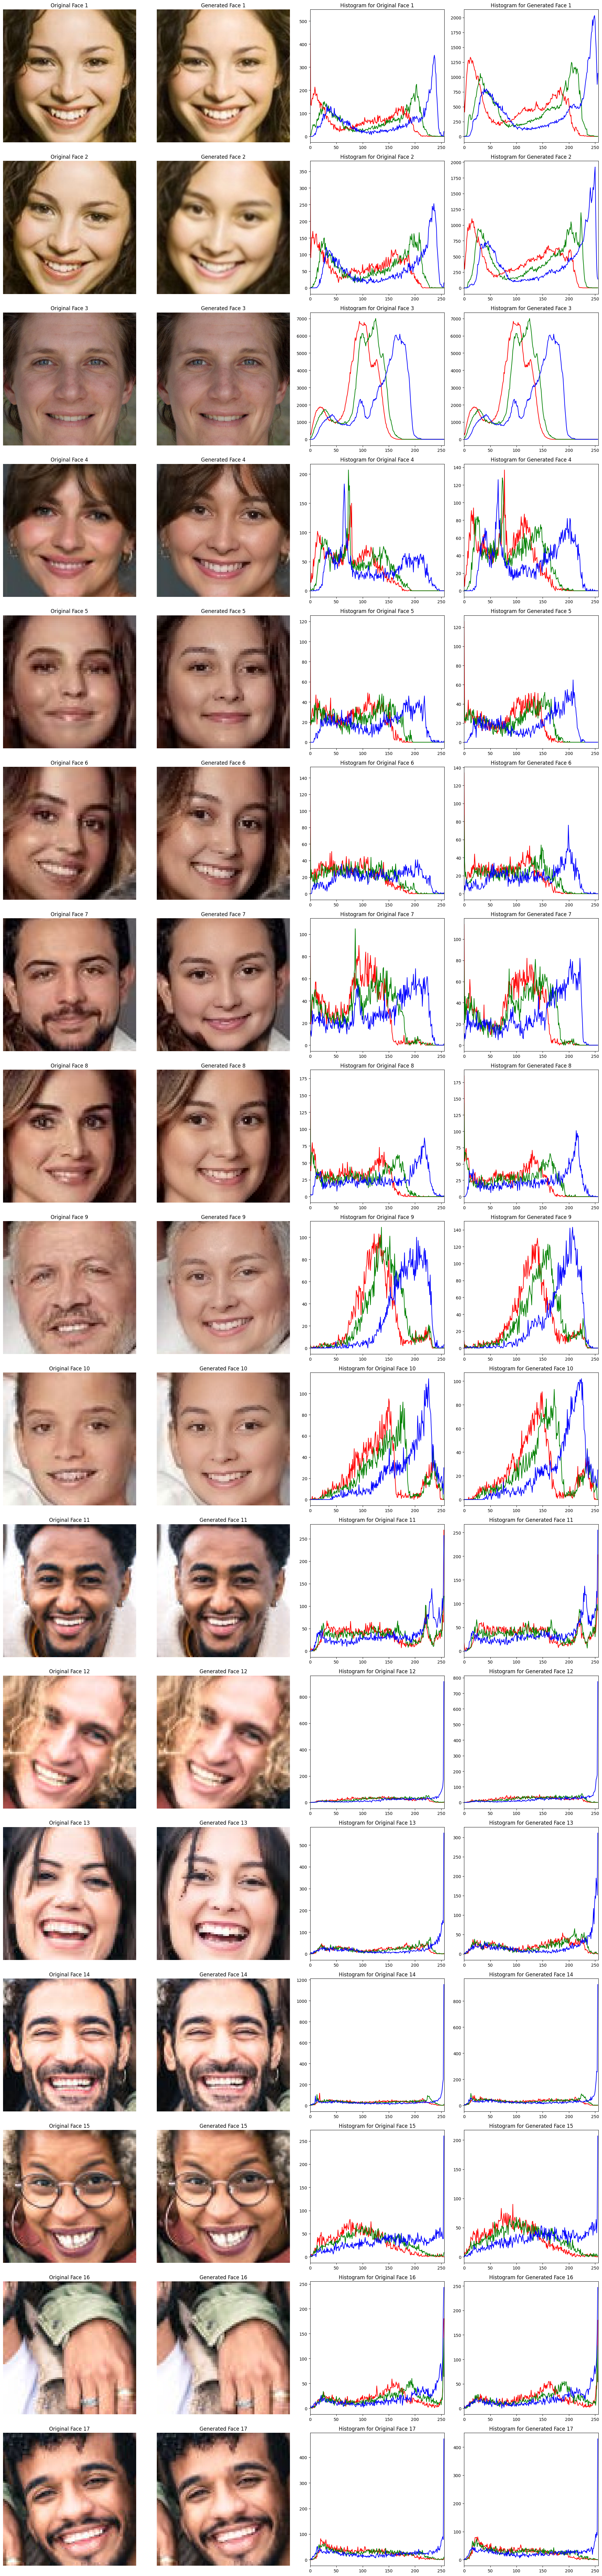

In [41]:
import cv2
import matplotlib.pyplot as plt
import os


def plot_rgb_histogram(face_img):
    colors = ('r', 'g', 'b')
    histograms = []
    for i, color in enumerate(colors):
        hist = cv2.calcHist([face_img], [i], None, [256], [0, 256])
        histograms.append((hist, color))
    return histograms

def process_faces_for_rgb_histograms(folder_path_orig, folder_path_gen):
    original_faces = []
    generated_faces = []
    original_histograms = []
    generated_histograms = []

    for filename in os.listdir(folder_path_orig):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path_orig = os.path.join(folder_path_orig, filename)
            image_path_gen = os.path.join(folder_path_gen, filename)
            detected_faces_orig = detect_faces(image_path_orig)
            detected_faces_gen = detect_faces(image_path_gen)

            for face_data in detected_faces_orig:
                face_img_orig = extract_face(image_path_orig, face_data)
                if face_img_orig is not None:
                    original_faces.append(face_img_orig)
                    original_histograms.append(plot_rgb_histogram(face_img_orig))

            for face_data in detected_faces_gen:
                face_img_gen = extract_face(image_path_gen, face_data)
                if face_img_gen is not None:
                    generated_faces.append(face_img_gen)
                    generated_histograms.append(plot_rgb_histogram(face_img_gen))

    num_faces = max(len(original_faces), len(generated_faces))
    fig, axes = plt.subplots(num_faces, 4, figsize=(20, num_faces * 5))

    for i in range(num_faces):
        if i < len(original_faces):
            axes[i, 0].imshow(cv2.cvtColor(original_faces[i], cv2.COLOR_BGR2RGB))
            axes[i, 0].set_title(f"Original Face {i + 1}")
            axes[i, 0].axis('off')
            for hist, color in original_histograms[i]:
                axes[i, 2].plot(hist, color=color)
            axes[i, 2].set_xlim([0, 256])
            axes[i, 2].set_title(f"Histogram for Original Face {i + 1}")

        if i < len(generated_faces):
            axes[i, 1].imshow(cv2.cvtColor(generated_faces[i], cv2.COLOR_BGR2RGB))
            axes[i, 1].set_title(f"Generated Face {i + 1}")
            axes[i, 1].axis('off')
            for hist, color in generated_histograms[i]:
                axes[i, 3].plot(hist, color=color)
            axes[i, 3].set_xlim([0, 256])
            axes[i, 3].set_title(f"Histogram for Generated Face {i + 1}")

    plt.tight_layout()
    plt.show()

process_faces_for_rgb_histograms(original_folder, generated_folder)

# Фурье распределение

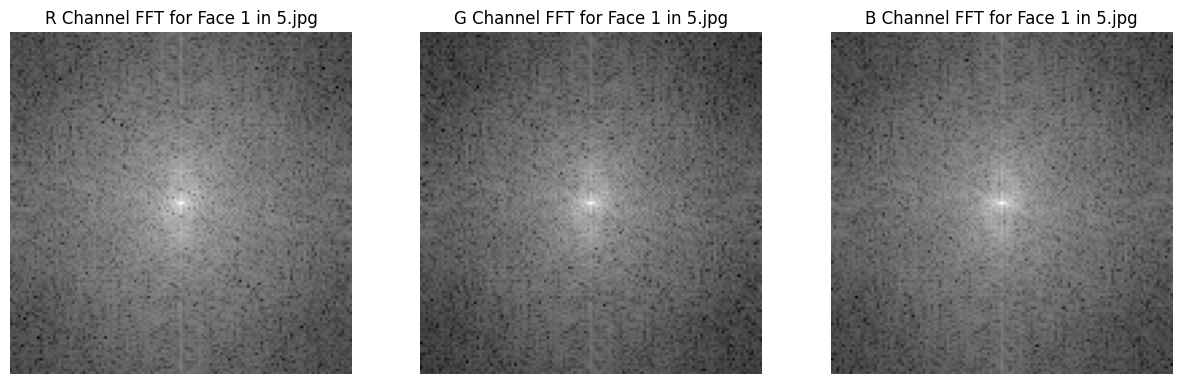

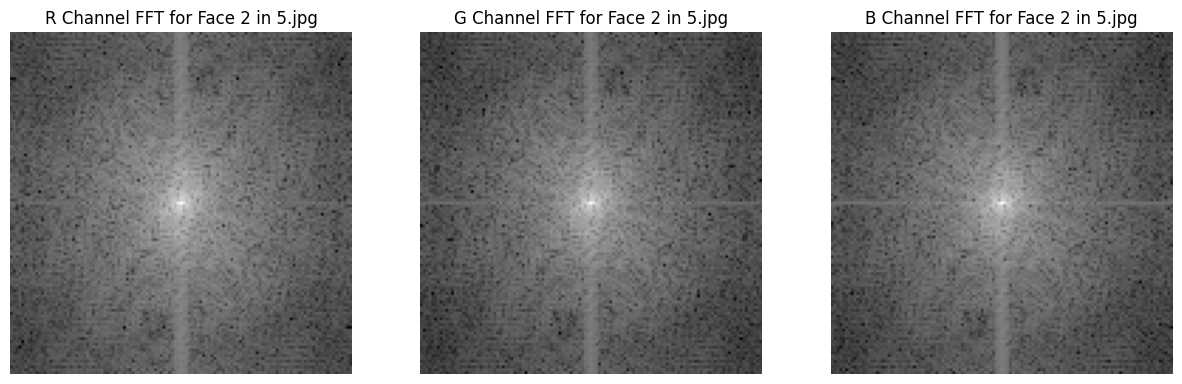

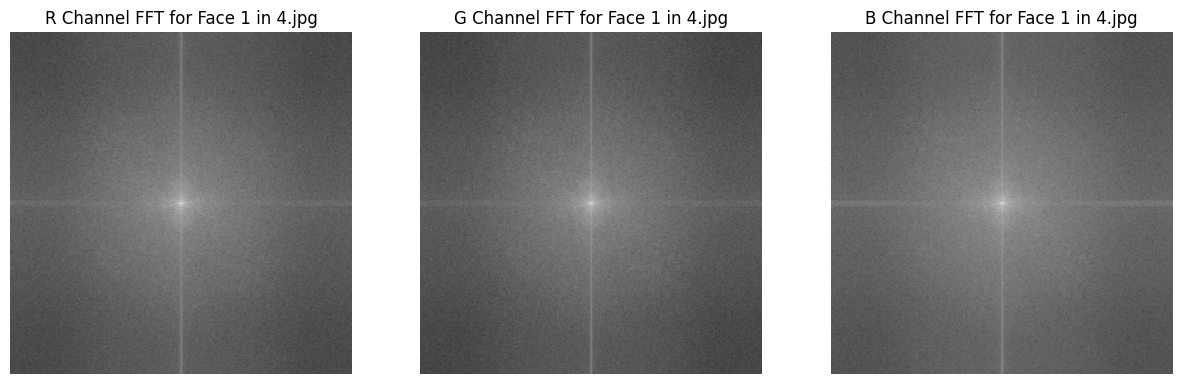

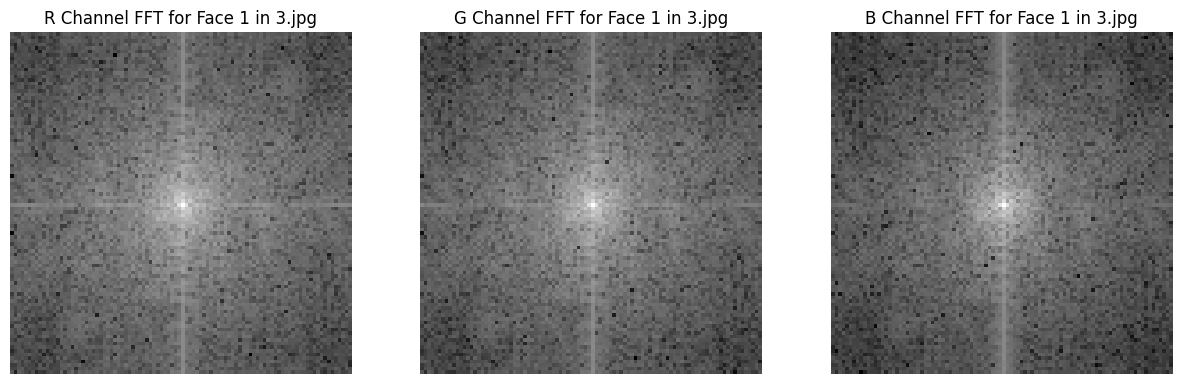

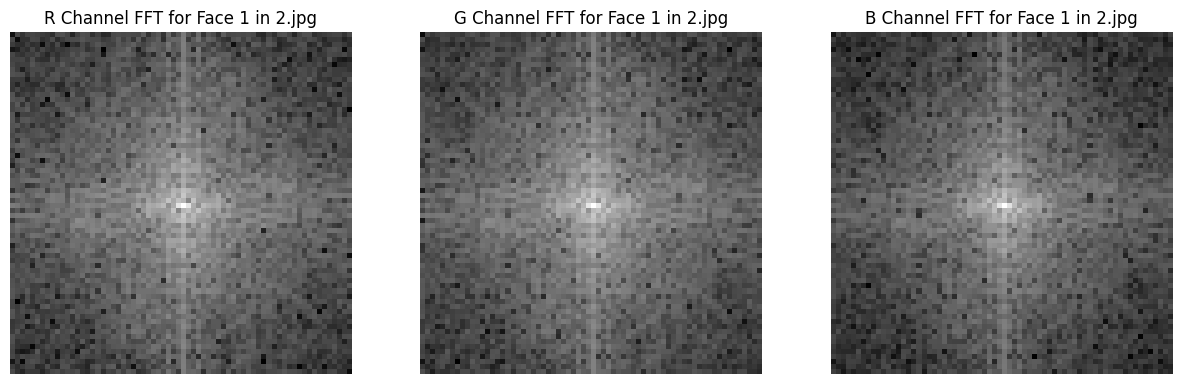

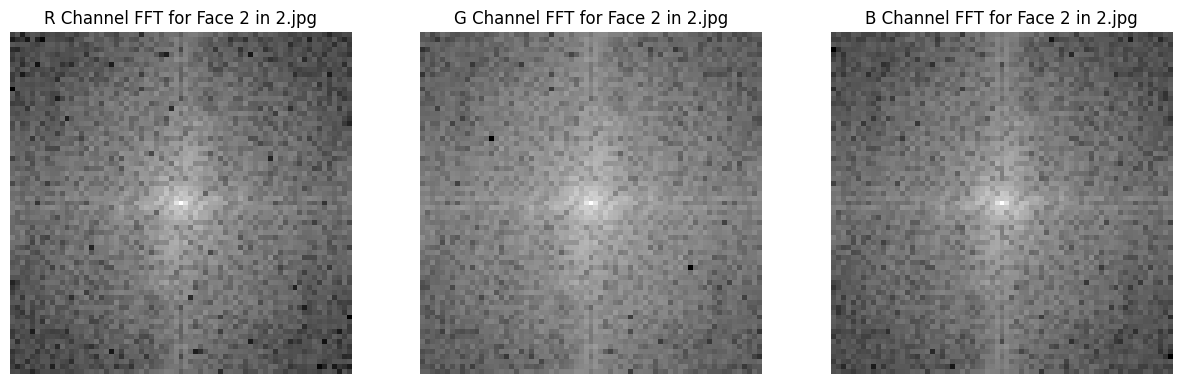

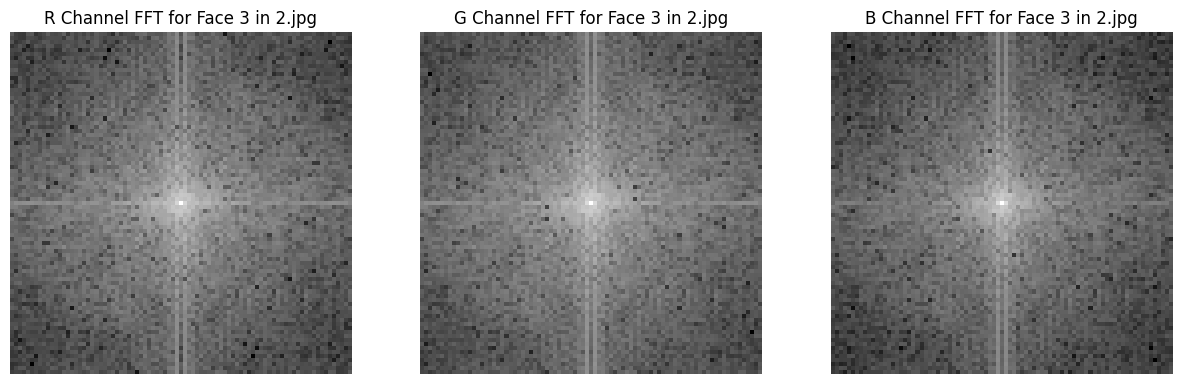

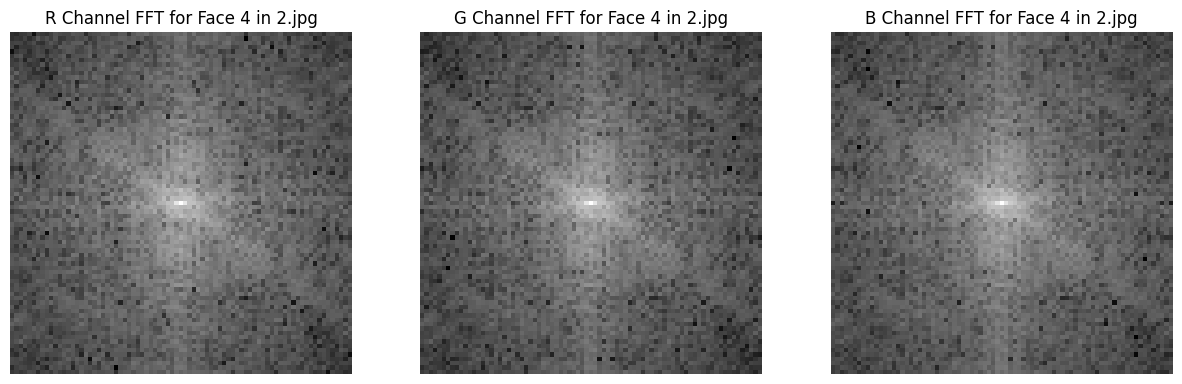

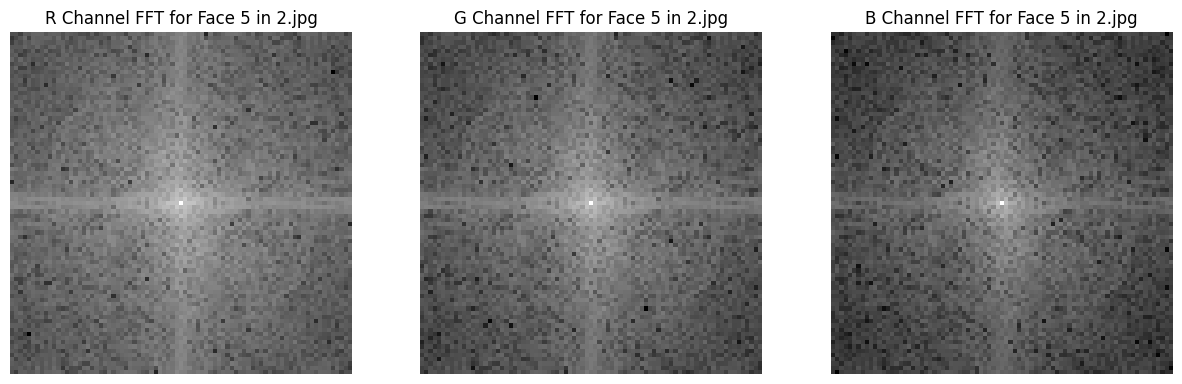

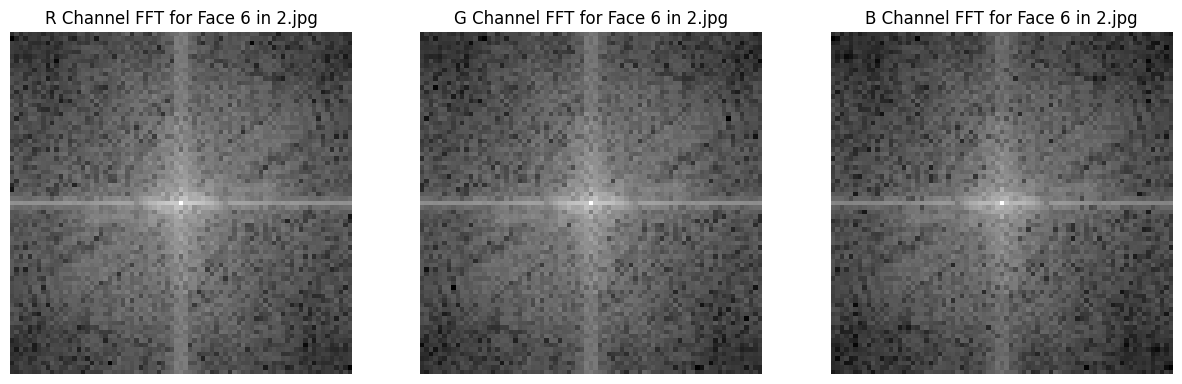

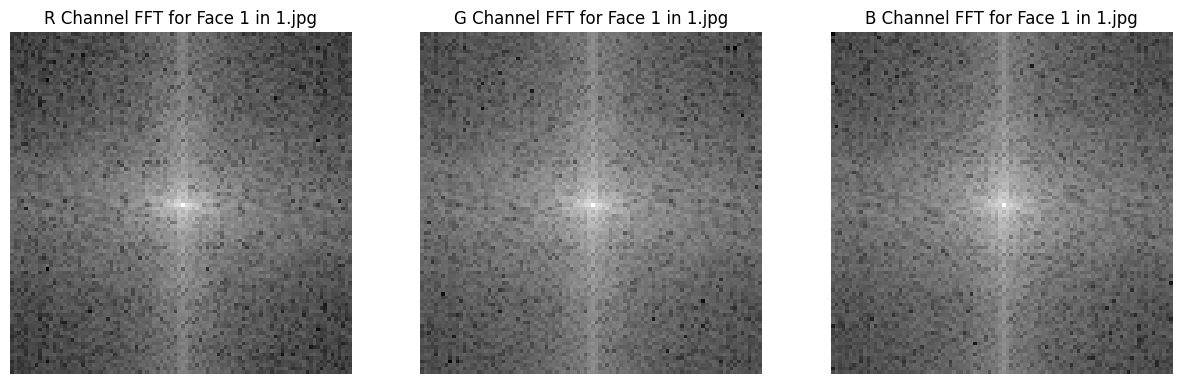

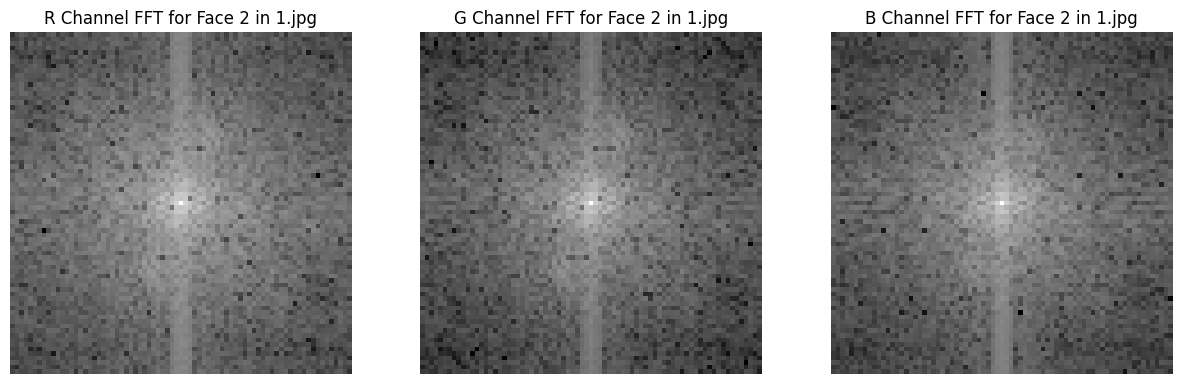

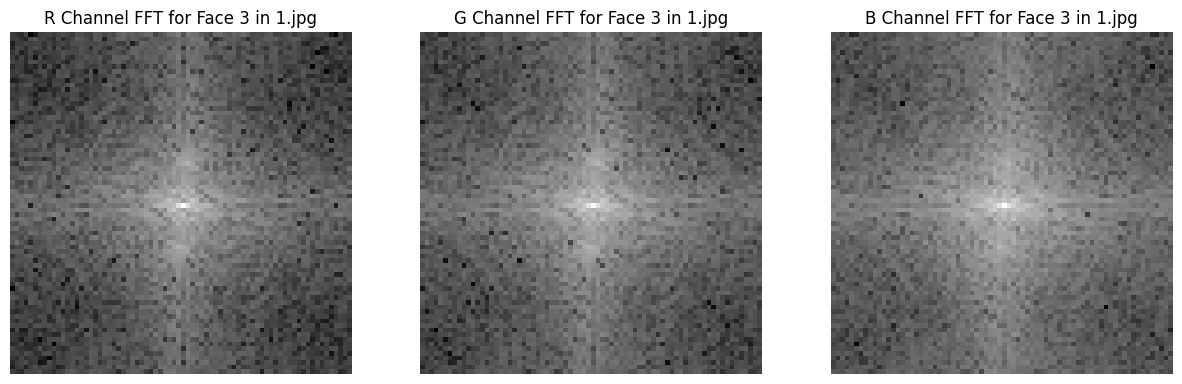

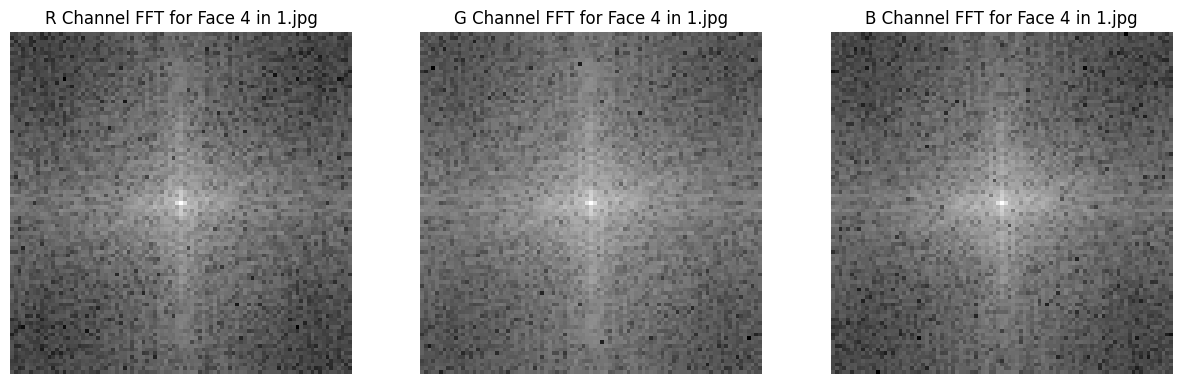

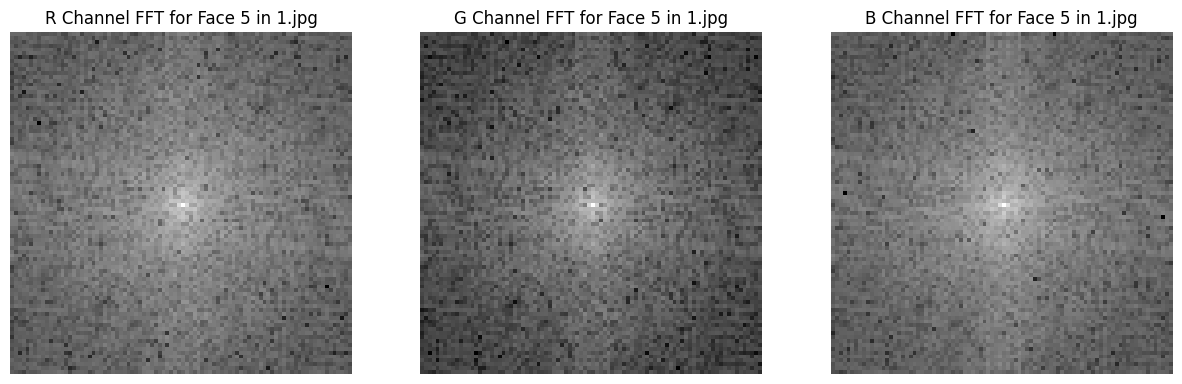

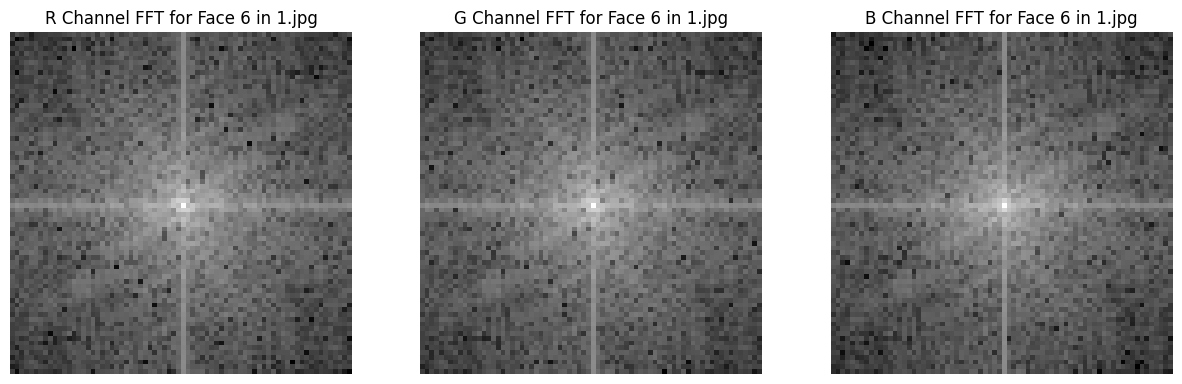

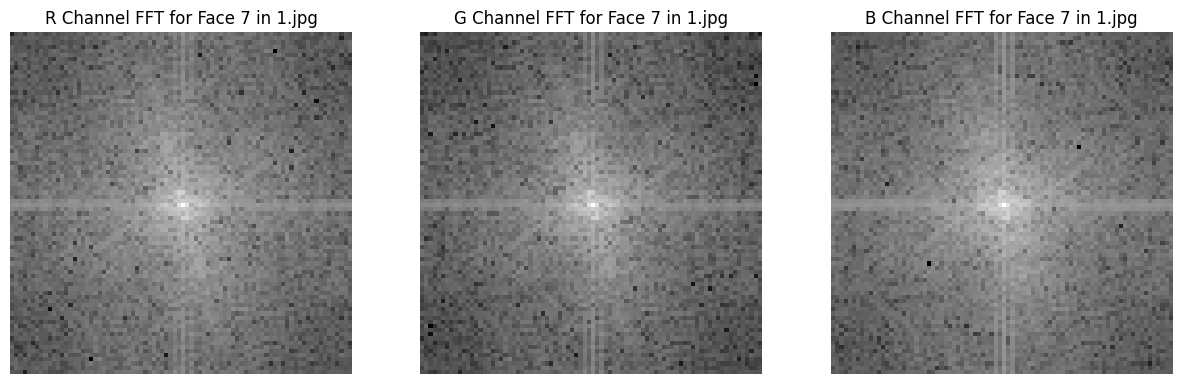

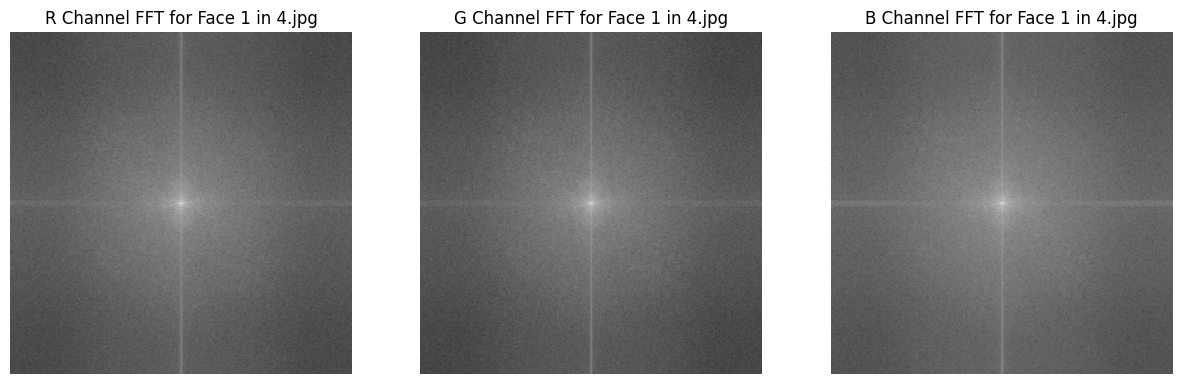

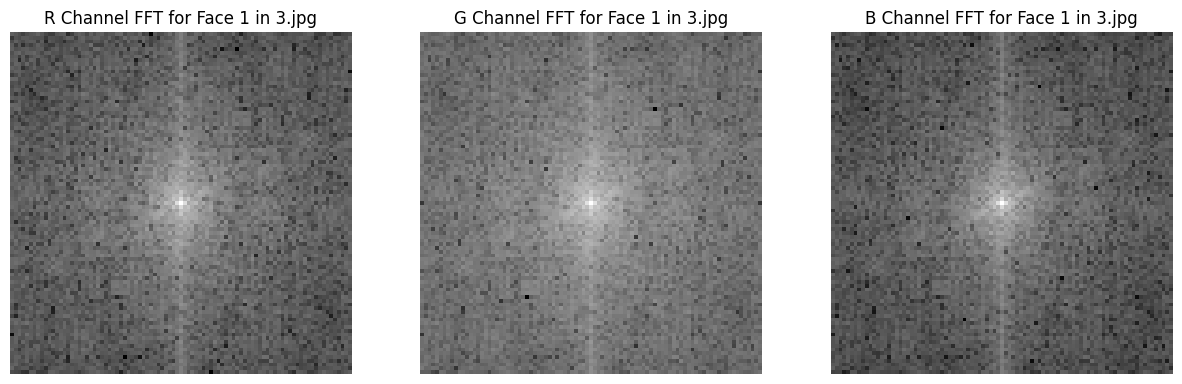

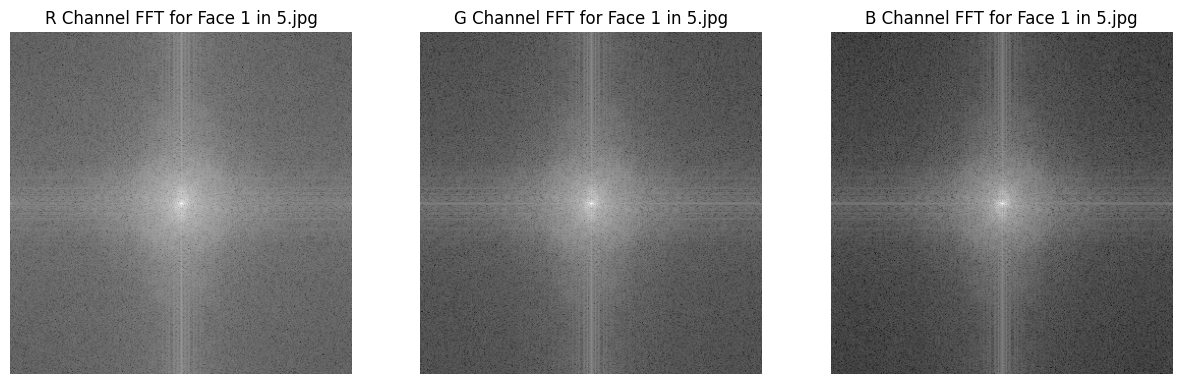

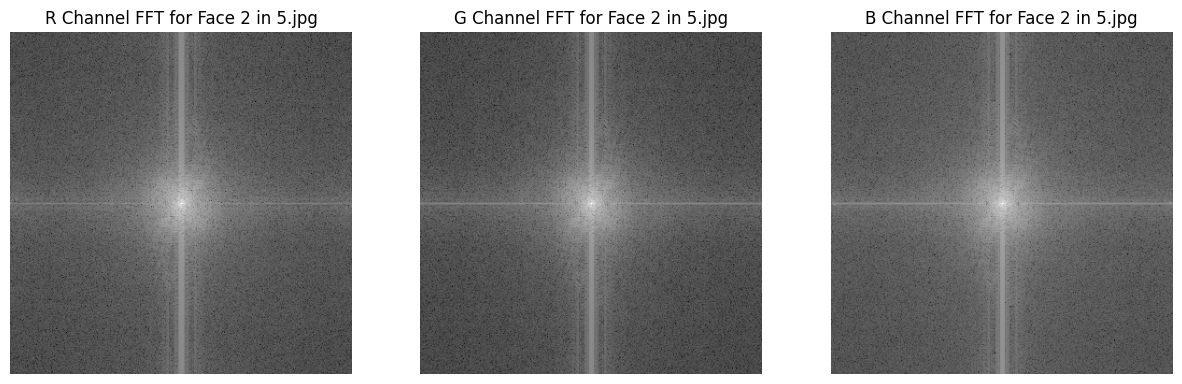

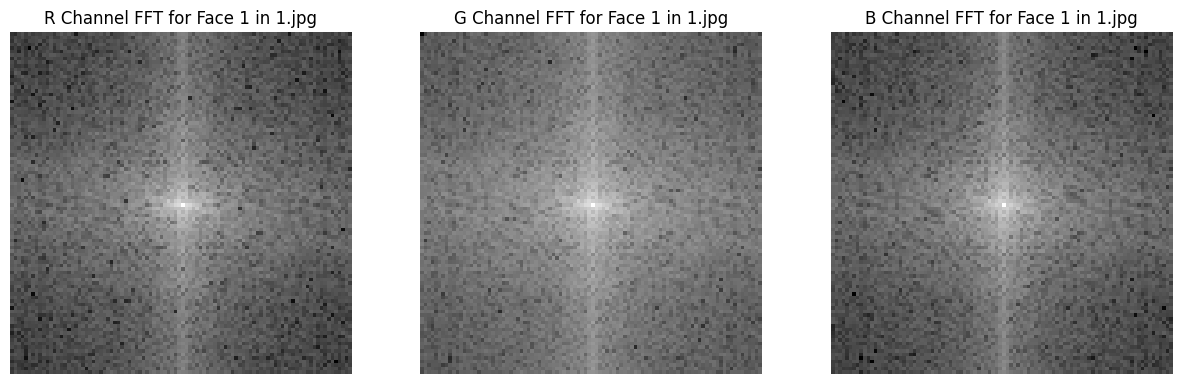

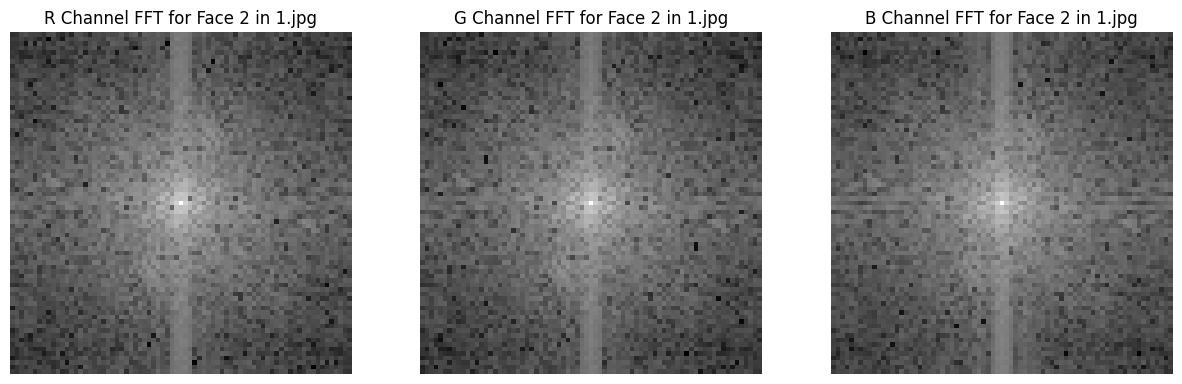

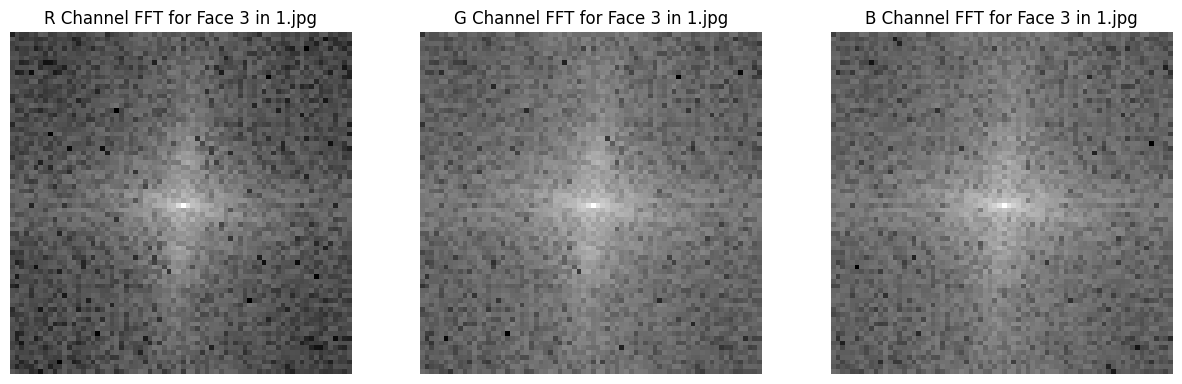

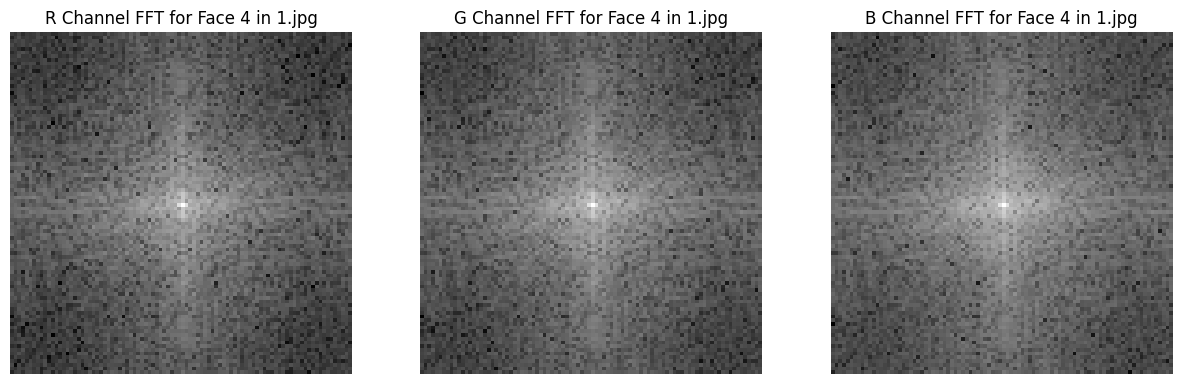

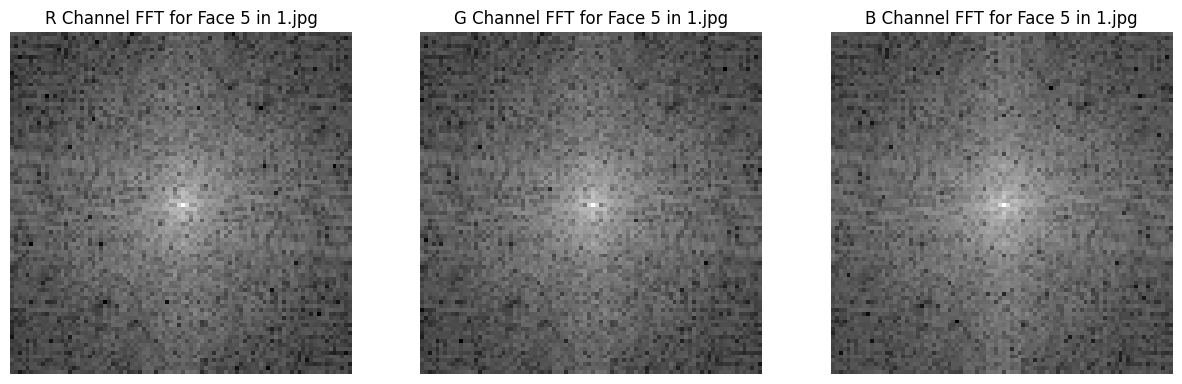

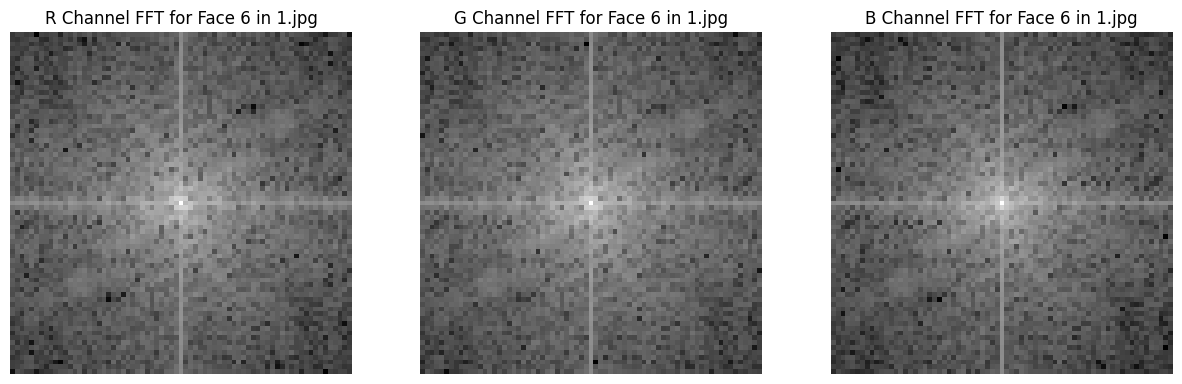

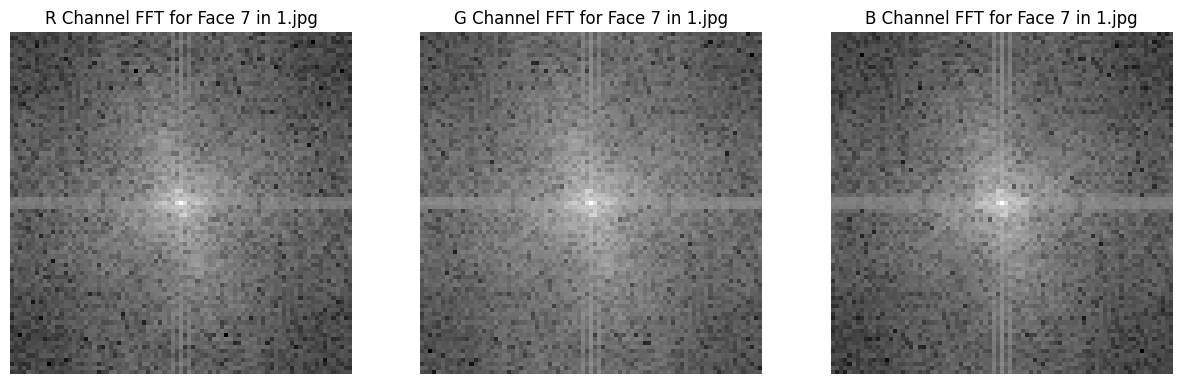

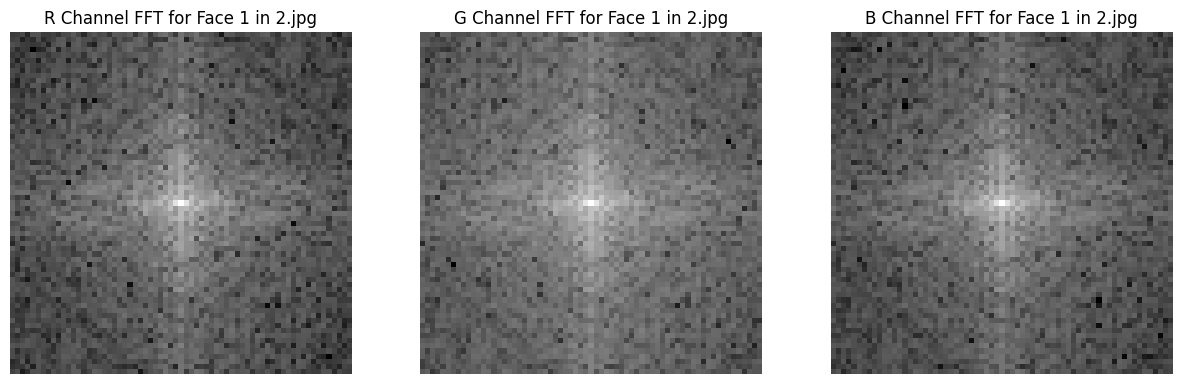

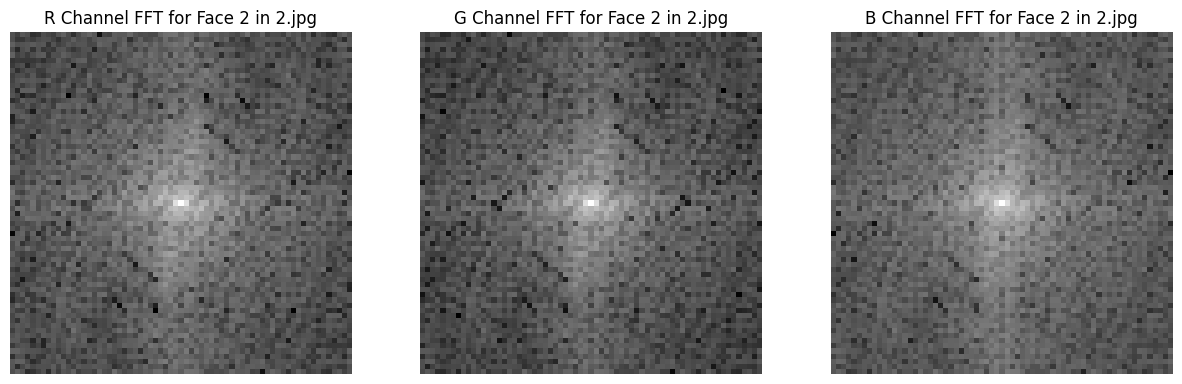

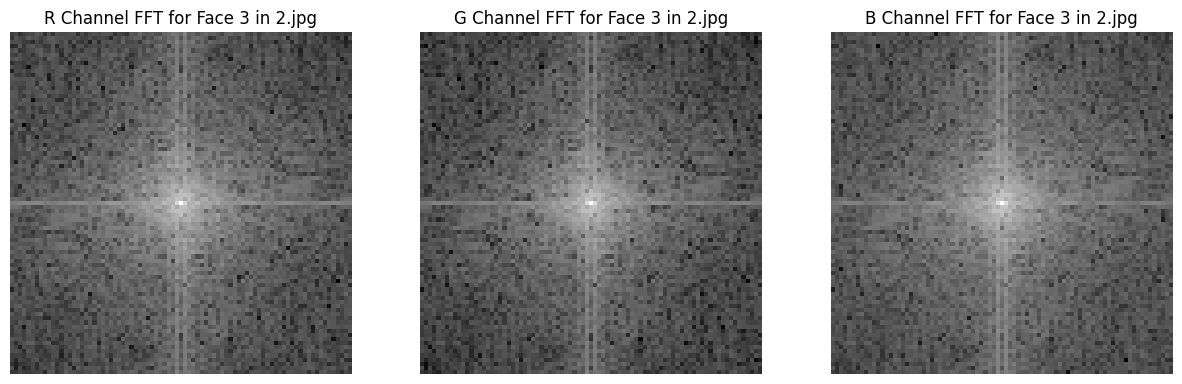

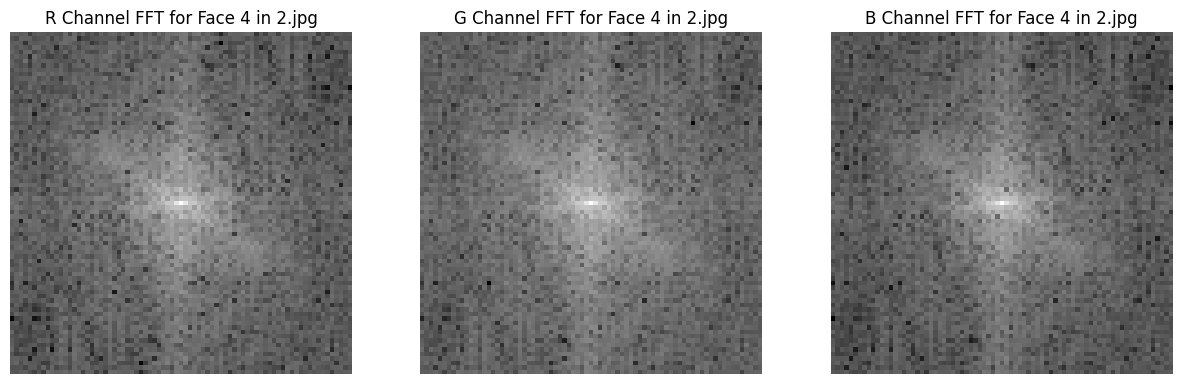

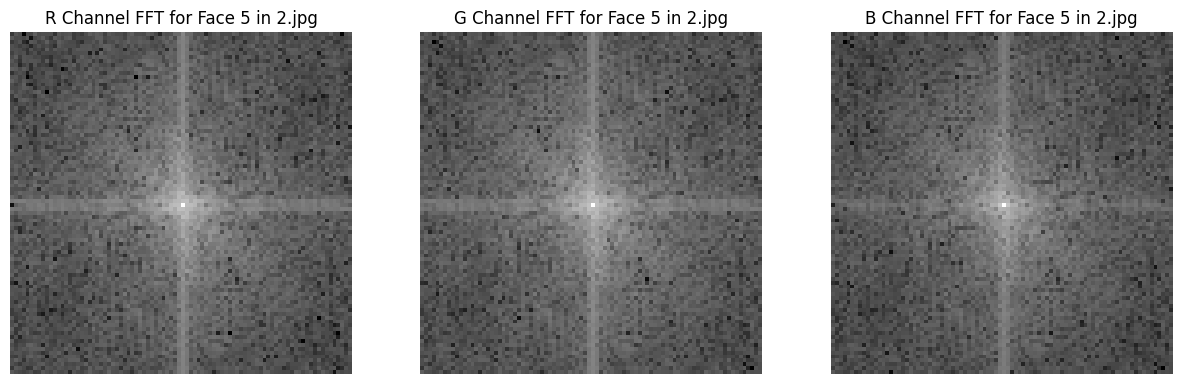

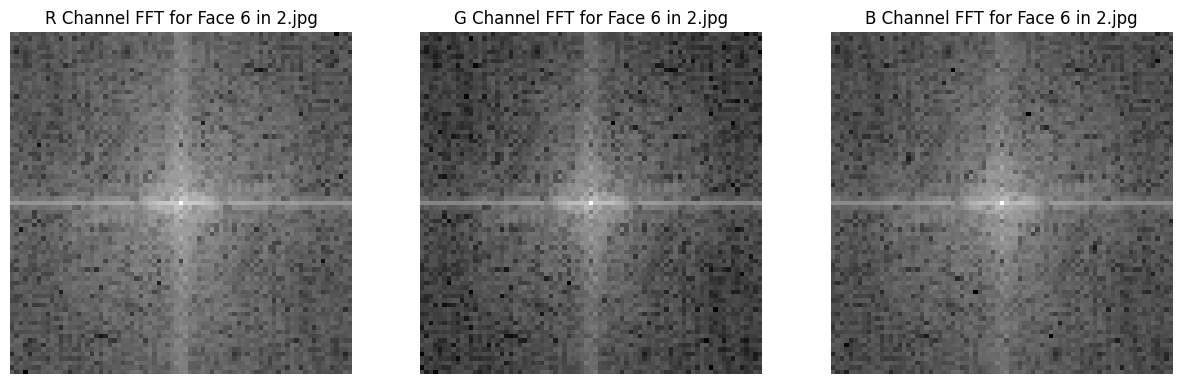

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_rgb_fft(face_img, image_filename):
    channels = cv2.split(face_img)
    colors = ('r', 'g', 'b')

    plt.figure(figsize=(15, 5))
    for i, color in enumerate(colors):
        channel_fft = np.fft.fft2(channels[i])
        channel_fft_shifted = np.fft.fftshift(channel_fft)
        channel_magnitude_spectrum = 20*np.log(np.abs(channel_fft_shifted))

        plt.subplot(1, 3, i+1)
        plt.imshow(channel_magnitude_spectrum, cmap='gray')
        plt.title(f"{color.upper()} Channel FFT for {image_filename}")
        plt.axis('off')

    plt.show()

def process_faces_for_rgb_fft(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            detected_faces = detect_faces(image_path)

            for index, face_data in enumerate(detected_faces):
                face_img = extract_face(image_path, face_data)
                if face_img is not None:
                    plot_rgb_fft(face_img, f"Face {index + 1} in {filename}")

process_faces_for_rgb_fft(original_folder)
process_faces_for_rgb_fft(generated_folder)